#AGENDA
###1 Trabajando con dataframes
###2 obteniendo medidas centrales
###3 Analizando graficas

##1 Trabajando con dataframes ( marco de datos )

In [8]:
#Instalando Librerias
!pip install statsmodels

In [9]:
!pip install wquantiles

In [10]:
import pandas as pd # manipulacion y analisis de datos
import numpy as np  # Calculos Matematicos
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns  # Graficas bonitas
import matplotlib.pyplot as plt

In [27]:
estado=pd.read_csv("/content/state.csv")

In [12]:
estado.head(3)  # eligue los 3 primeros datos

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ


In [13]:
estado.tail(3) #elige los 3 ultimos datos

,State,Population,Murder.Rate,Abbreviation
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [14]:
estado.sample(5) # eligue 5 datos al azar

,State,Population,Murder.Rate,Abbreviation
7,Delaware,897934,5.8,DE
10,Hawaii,1360301,1.8,HI
32,North Carolina,9535483,5.1,NC
11,Idaho,1567582,2.0,ID
27,Nevada,2700551,6.0,NV


In [15]:
estado.columns # Muestra el nombre de las columnas

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [16]:
list(estado.columns) # transforma el index en una lista

['State', 'Population', 'Murder.Rate', 'Abbreviation']

In [17]:
estado.info() # Muestra la informacion de las columnas para siempre

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [18]:
estado.describe() # Muestra las estadisticas de las columnas numericas

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


##2 Analizar medidas de tendencia central : tasas de poblacion y asesinatos

In [21]:
estado.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [25]:
estado["Population"].mean() # tomar una feature

6162876.3

In [26]:
trim_mean(estado.Population, 0.1)

4783697.125

In [28]:
estado["Murder.Rate"].mean()

4.066

In [30]:
# Media ponderada
np.average(estado.Population, weights=estado.Population)

13620491.638786951

In [32]:
np.average(estado["Murder.Rate"], weights=estado.Population)

4.445833981123393

In [33]:
estado.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


<Axes: >

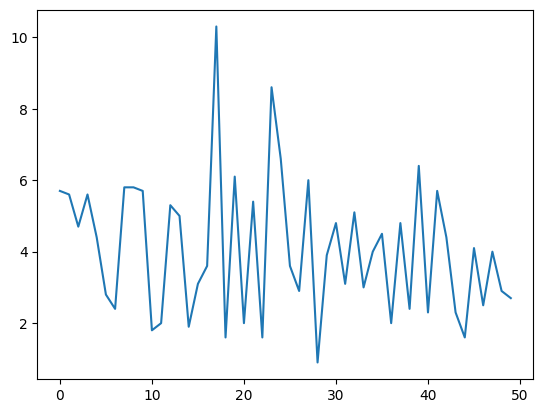

In [35]:
estado["Murder.Rate"].plot.line()

<Axes: >

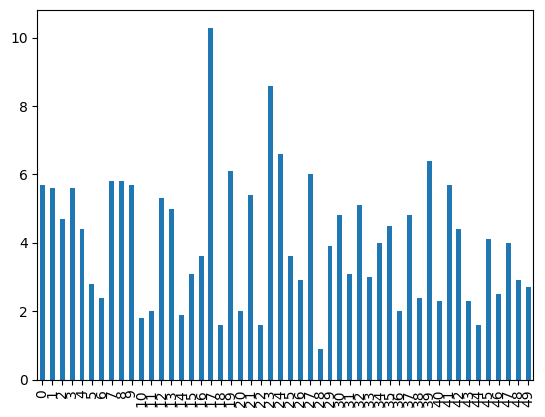

In [36]:
estado["Murder.Rate"].plot.bar()

<Axes: >

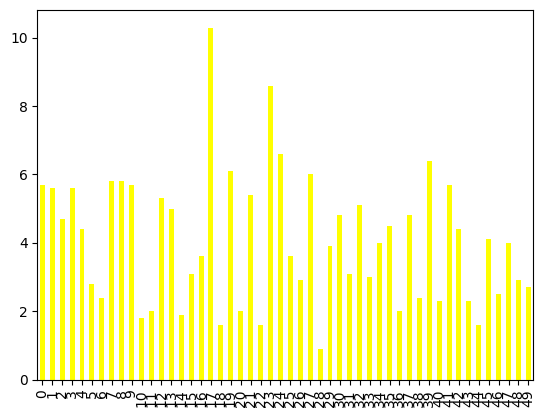

In [42]:
estado["Murder.Rate"].plot.bar(color="yellow")

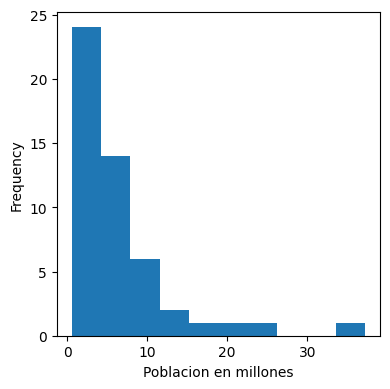

In [43]:
ax=(estado.Population/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel("Poblacion en millones")
plt.tight_layout()
plt.show()

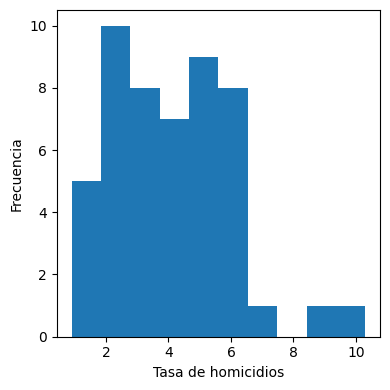

In [46]:
ax=(estado["Murder.Rate"]).plot.hist(figsize=(4,4))
ax.set_xlabel("Tasa de homicidios")
ax.set_ylabel("Frecuencia")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figur

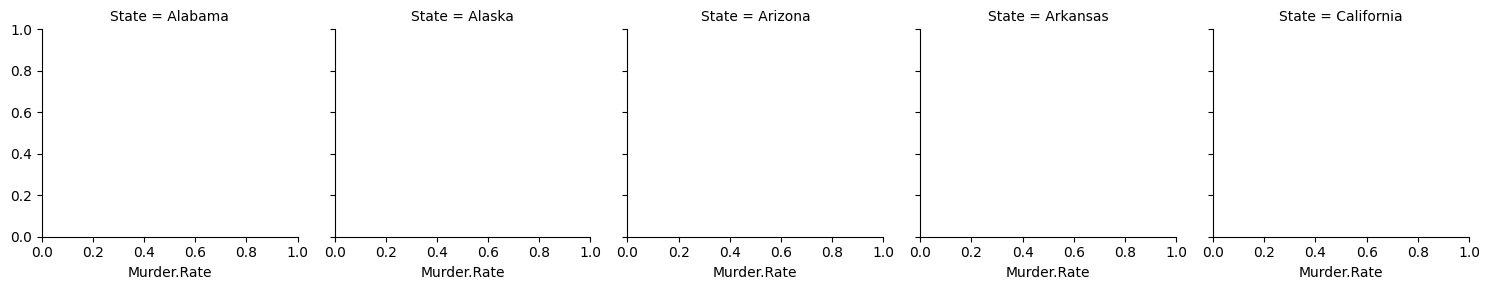

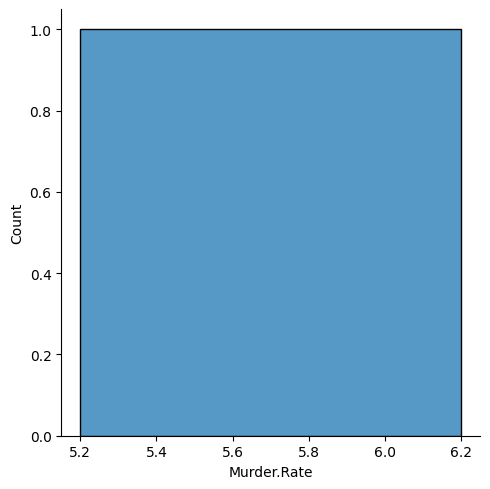

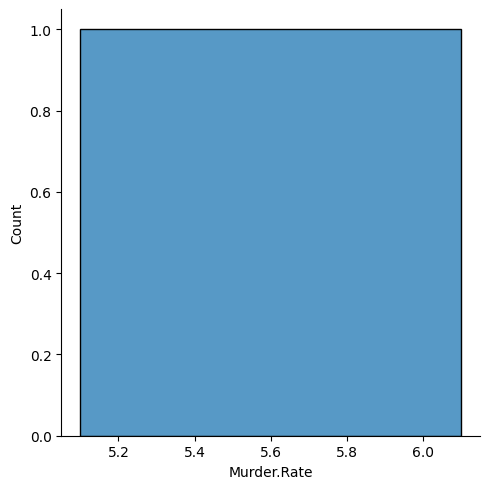

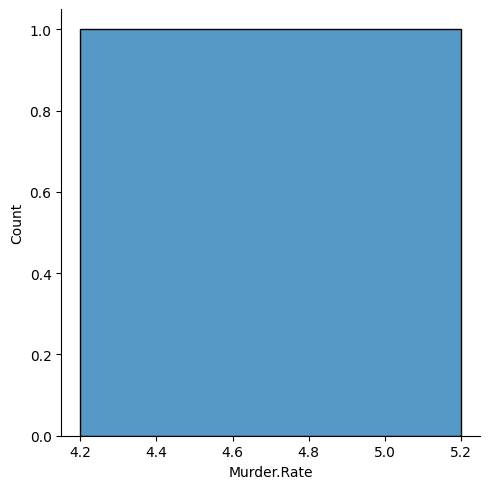

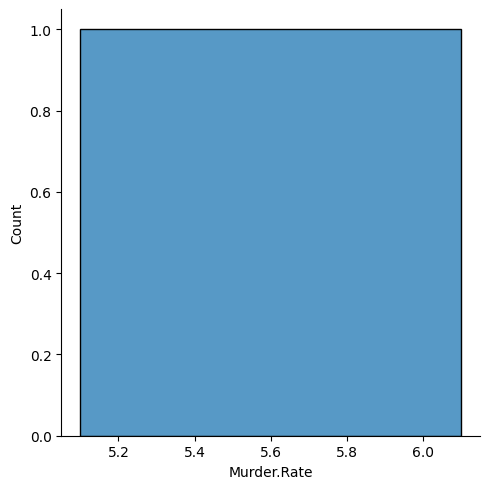

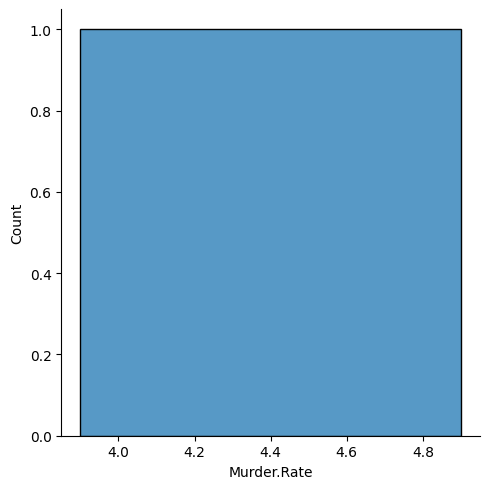

In [48]:
analisis=estado.head()
g=sns.FacetGrid(analisis,col="State")
g.map(sns.displot,"Murder.Rate")

In [51]:
poblacion=pd.read_csv("/content/Poblaci_n_Antioquia_censada_2018_por_tipo_territorio__sexo_y_edades_simples.csv")

In [52]:
poblacion

,CodigoMunicipio,NombreMunicipio,Edad,Hombres_Cabecera,Mujeres_Cabecera,Hombres_CentroPoblado,Mujeres_CentroPoblado,HombresRuralDisperso,MujeresRuralDisperso
0,5001,Medellín,0,11374,10739,131,110,85,99
1,5001,Medellín,1,12173,11637,126,120,109,116
2,5001,Medellín,2,12795,12012,137,103,108,105
3,5001,Medellín,3,12796,12197,120,126,119,103
4,5001,Medellín,4,12518,11949,103,116,82,101
...,...,...,...,...,...,...,...,...,...
12820,5895,Zaragoza,94,0,3,0,0,1,0
12821,5895,Zaragoza,97,1,0,0,0,0,0
12822,5895,Zaragoza,98,1,0,1,0,0,0
12823,5895,Zaragoza,102,0,0,0,0,0,1


In [53]:
poblacion["Hombres_Cabecera"].mean()

175.28920077972708

In [58]:
np.average(poblacion["Hombres_Cabecera"], weights=poblacion.Hombres_Cabecera)

7940.627545056145

In [59]:
poblacion.head()

,CodigoMunicipio,NombreMunicipio,Edad,Hombres_Cabecera,Mujeres_Cabecera,Hombres_CentroPoblado,Mujeres_CentroPoblado,HombresRuralDisperso,MujeresRuralDisperso
0,5001,Medellín,0,11374,10739,131,110,85,99
1,5001,Medellín,1,12173,11637,126,120,109,116
2,5001,Medellín,2,12795,12012,137,103,108,105
3,5001,Medellín,3,12796,12197,120,126,119,103
4,5001,Medellín,4,12518,11949,103,116,82,101


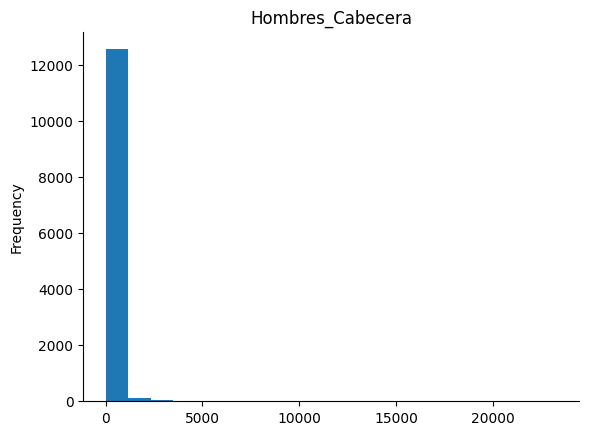

In [62]:
# @title Hombres_Cabecera

from matplotlib import pyplot as plt
poblacion['Hombres_Cabecera'].plot(kind='hist', bins=20, title='Hombres_Cabecera')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

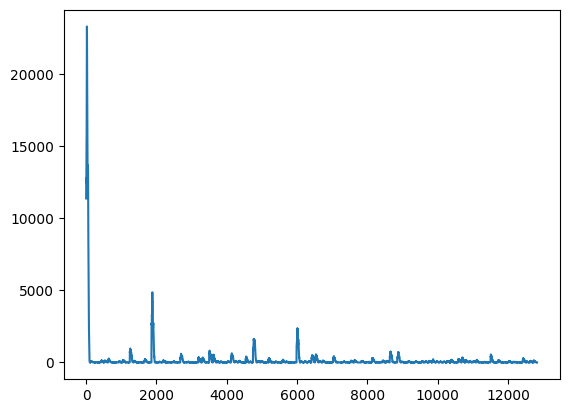

In [60]:
poblacion["Hombres_Cabecera"].plot.line()

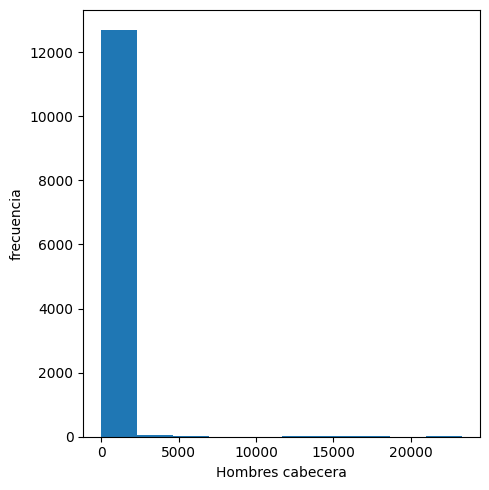

In [65]:
ax=(estado["Hombres_Cabecera"]).plot.hist(figsize=(5,5))
ax.set_xlabel("Hombres cabecera")
ax.set_ylabel("frecuencia")
plt.tight_layout()
plt.show()

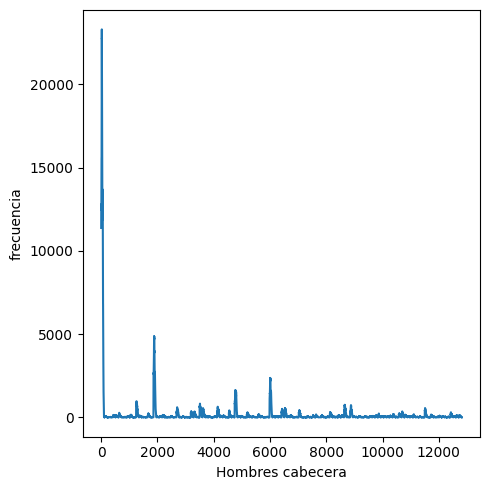

In [66]:
ax=(estado["Hombres_Cabecera"]).plot.line(figsize=(5,5))
ax.set_xlabel("Hombres cabecera")
ax.set_ylabel("frecuencia")
plt.tight_layout()
plt.show()